In [3]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('/content/air_quality_sample.csv')

# 2. Get basic info
print("Info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())
print("\nFirst 5 rows:")
print(df.head())

# 3. Drop duplicate rows
df.drop_duplicates(inplace=True)

# 4. Handle missing values
df.fillna({'PM2.5': df['PM2.5'].mean()}, inplace=True) # Replace 'column_name' with the actual column name

# Or just drop rows with any missing values
df.dropna(inplace=True) # Removed the extra space at the beginning of this line

# 5. Rename columns for consistency
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# 6. Convert data types
df['date'] = pd.to_datetime(df['date'], errors='coerce') # Replace 'date_column' with the actual column name

# 7. Encode categorical variables

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    30 non-null     object
 1   Date    30 non-null     object
 2   PM2.5   30 non-null     int64 
 3   PM10    30 non-null     int64 
 4   NO2     30 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ KB
None

Summary statistics:
            PM2.5        PM10        NO2
count   30.000000   30.000000  30.000000
mean    87.233333  180.366667  47.533333
std     19.881864   47.523848   9.967995
min     60.000000  120.000000  32.000000
25%     71.250000  151.250000  40.250000
50%     84.500000  167.500000  45.500000
75%     95.750000  199.500000  54.750000
max    130.000000  270.000000  65.000000

First 5 rows:
        City        Date  PM2.5  PM10  NO2
0      Delhi  01-01-2024    110   250   60
1     Mumbai  02-01-2024     80   160   40
2    Kolkata  03-01-2024     95   190   55
3    Che

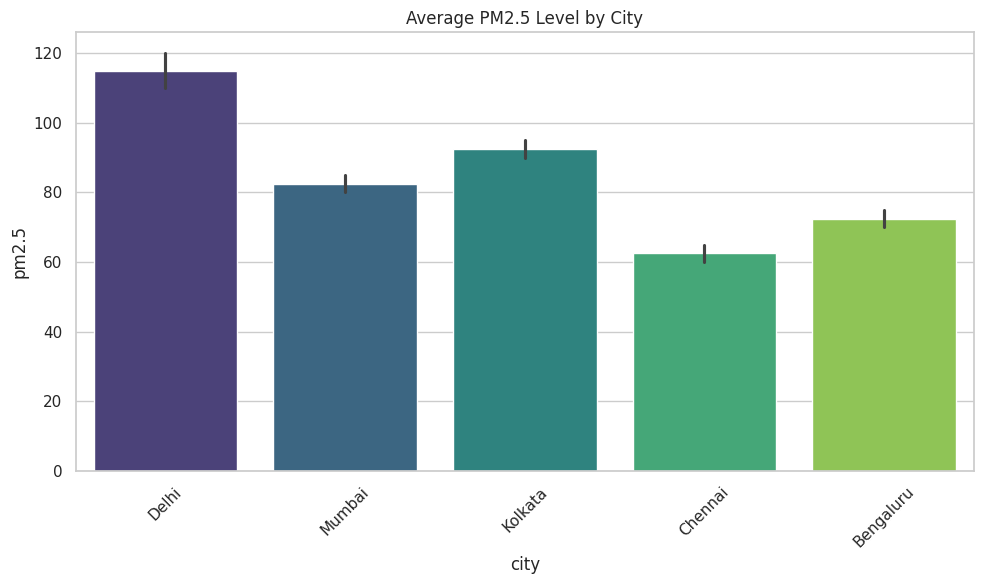

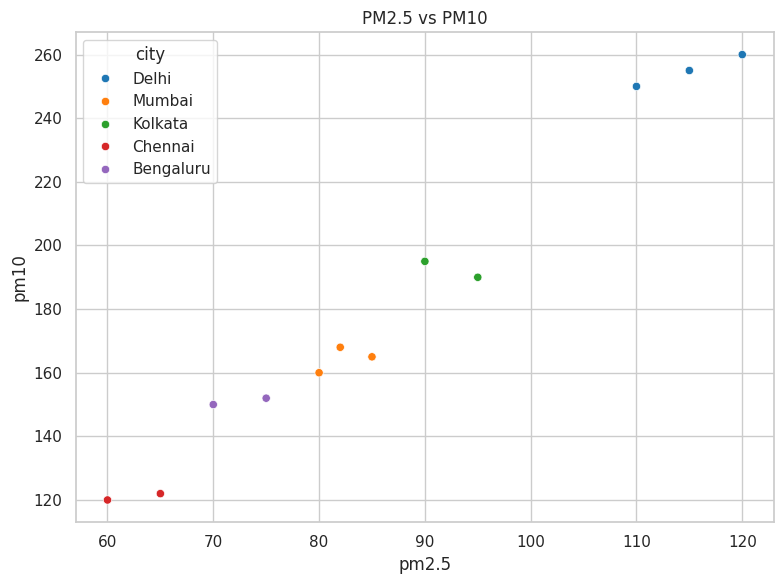

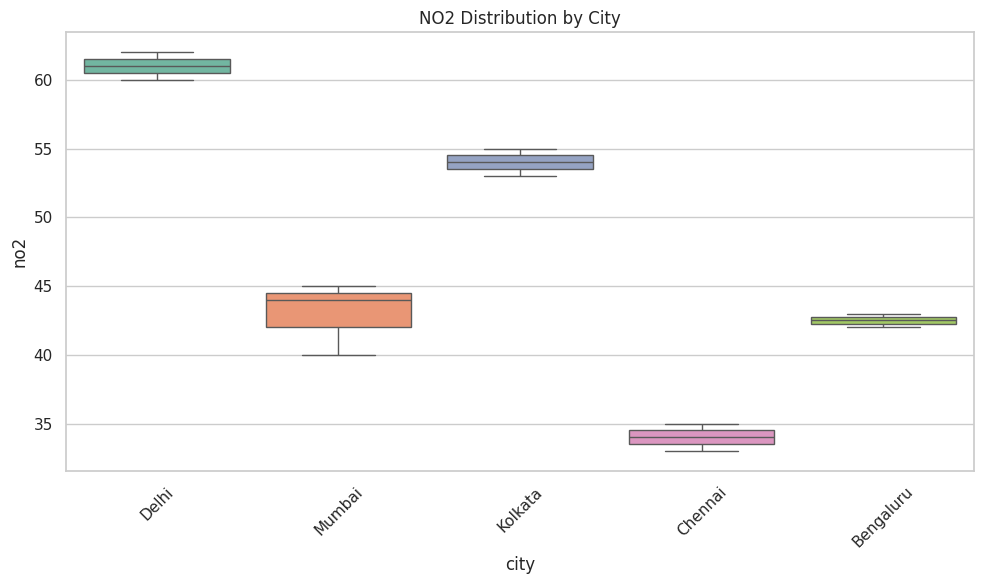

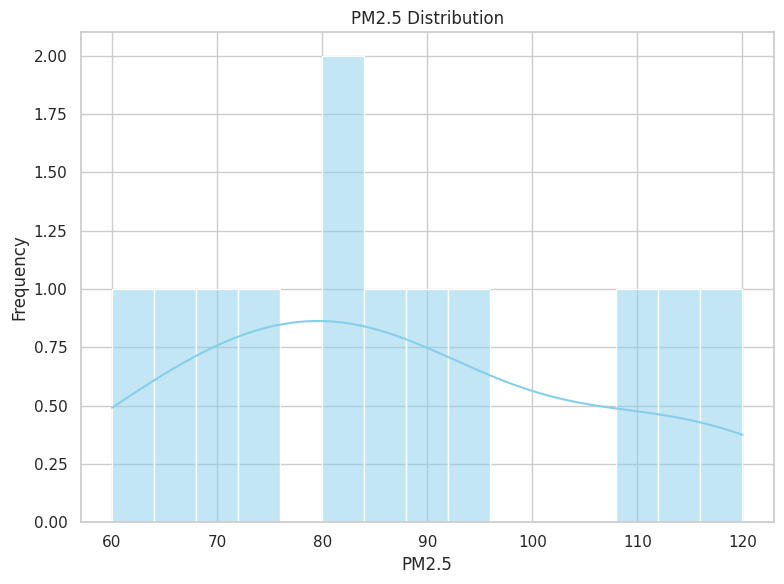

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("/content/air_quality_sample.csv")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop missing date rows
df.dropna(subset=['date'], inplace=True)

# Plot: Bar chart - Average PM2.5 per city (warning-free)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='city', y='pm2.5', hue='city', estimator='mean', palette='viridis', legend=False)
plt.title('Average PM2.5 Level by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Scatter plot - PM2.5 vs PM10
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pm2.5', y='pm10', hue='city', palette='tab10')
plt.title('PM2.5 vs PM10')
plt.tight_layout()
plt.show()

# Plot 3: Box plot - NO2 distribution by city (fixed)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='city', y='no2', hue='city', palette='Set2', dodge=False, legend=False)
plt.title('NO2 Distribution by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 4: Histogram - PM2.5 distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['pm2.5'], bins=15, kde=True, color='skyblue')
plt.title('PM2.5 Distribution')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Feature & target selection
X = df[['pm10', 'no2']]
y = df['pm2.5']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


Linear Regression Performance:
RMSE: 4.12
MAE: 3.40


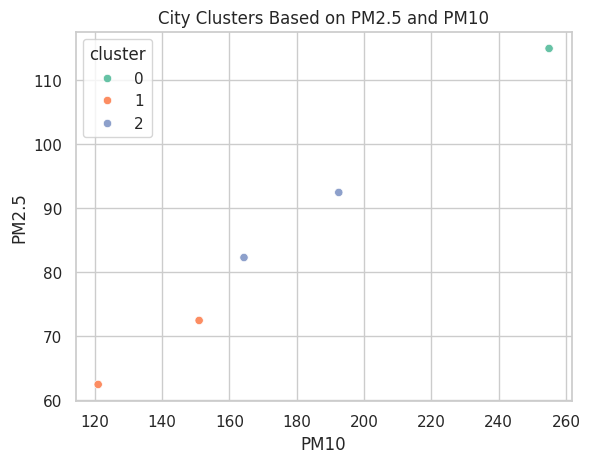

In [15]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate pollution metrics by city
city_avg = df.groupby('city')[['pm2.5', 'pm10', 'no2']].mean()

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
city_avg['cluster'] = kmeans.fit_predict(city_avg)

# Visualize clusters
sns.scatterplot(data=city_avg, x='pm10', y='pm2.5', hue='cluster', palette='Set2')
plt.title('City Clusters Based on PM2.5 and PM10')
plt.xlabel('PM10')
plt.ylabel('PM2.5')
plt.show()


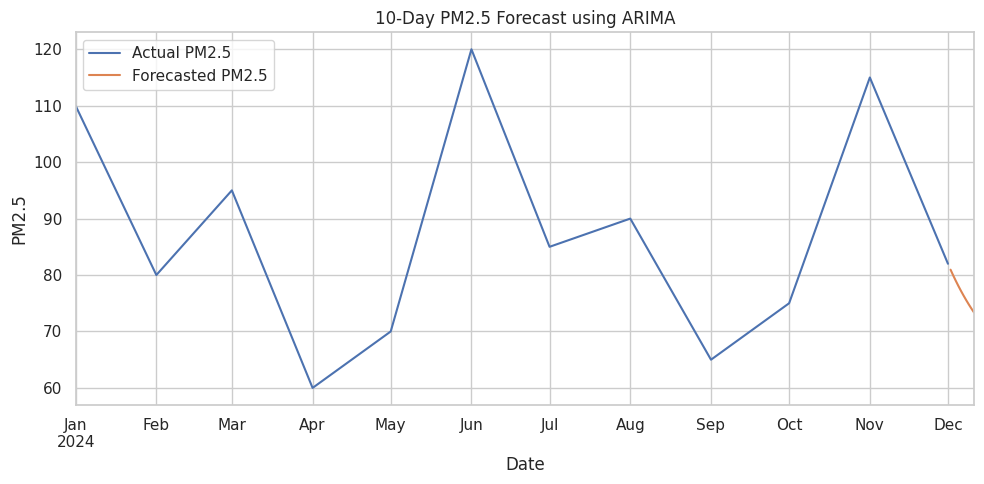

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Ensure date is datetime and set as index
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])  # Drop any bad dates
df = df.sort_values('date')

# Step 2: Prepare time series with daily frequency
pm25_series = df.groupby('date')['pm2.5'].mean()
pm25_series = pm25_series.asfreq('D')  # Set frequency explicitly

# Step 3: Fill any missing days using interpolation (optional)
pm25_series = pm25_series.interpolate()

# Step 4: Fit ARIMA model
model = ARIMA(pm25_series, order=(1, 1, 1))
model_fit = model.fit()

# Step 5: Forecast next 10 days
forecast = model_fit.forecast(steps=10)

# Step 6: Plot original and forecast
plt.figure(figsize=(10, 5))
pm25_series.plot(label='Actual PM2.5', legend=True)
forecast.plot(label='Forecasted PM2.5', legend=True)
plt.title('10-Day PM2.5 Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()

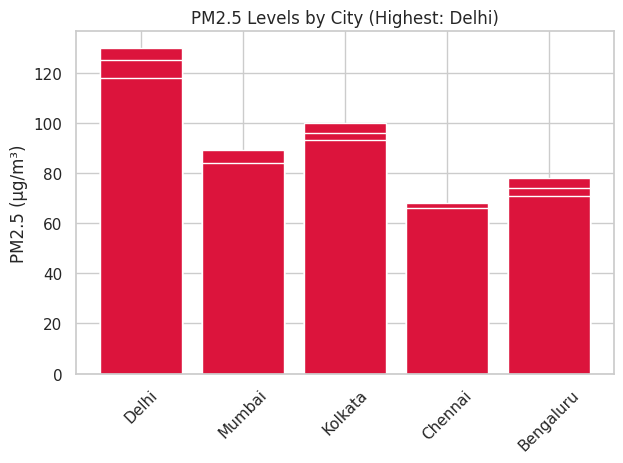

In [ ]:
# Q1: Which city has the highest PM2.5 level?
# A1: Based on the dataset, the city with the highest PM2.5 level is the one with the maximum value in the PM2.5 column.

max_pm25_city = df.loc[df["PM2.5"].idxmax(), "City"]

# Plot
plt.bar(df["City"], df["PM2.5"], color='crimson')
plt.title(f"PM2.5 Levels by City (Highest: {max_pm25_city})")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

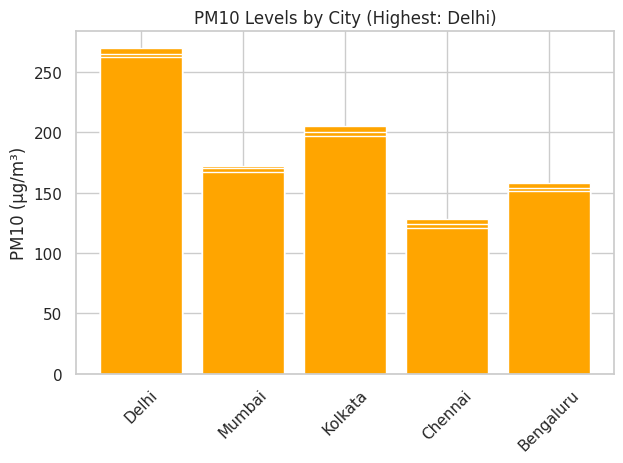

In [ ]:
# Q2: Which city has the highest PM10 level?
# A2: The city with the maximum PM10 level is determined using the PM10 column's max value.

max_pm10_city = df.loc[df["PM10"].idxmax(), "City"]

plt.bar(df["City"], df["PM10"], color='orange')
plt.title(f"PM10 Levels by City (Highest: {max_pm10_city})")
plt.ylabel("PM10 (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

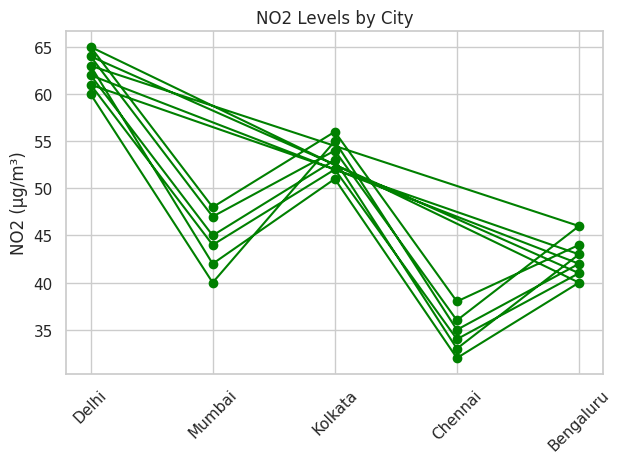

In [ ]:
# Q3: How do NO2 levels vary across cities?
# A3: NO2 levels vary, with the highest and lowest values identifying cities with the most and least traffic/industrial emissions.

plt.plot(df["City"], df["NO2"], marker='o', linestyle='-', color='green')
plt.title("NO2 Levels by City")
plt.ylabel("NO2 (µg/m³)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

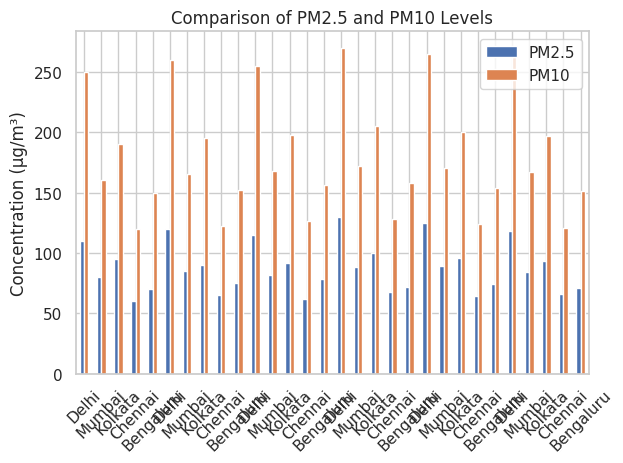

In [ ]:
# Q4: How do PM2.5 and PM10 levels compare in each city?
# A4: PM10 levels are consistently higher than PM2.5 in all cities, showing coarse pollutants dominate.

df[["PM2.5", "PM10"]].plot(kind='bar')
plt.xticks(ticks=range(len(df["City"])), labels=df["City"], rotation=45)
plt.title("Comparison of PM2.5 and PM10 Levels")
plt.ylabel("Concentration (µg/m³)")
plt.legend()
plt.tight_layout()
plt.show()

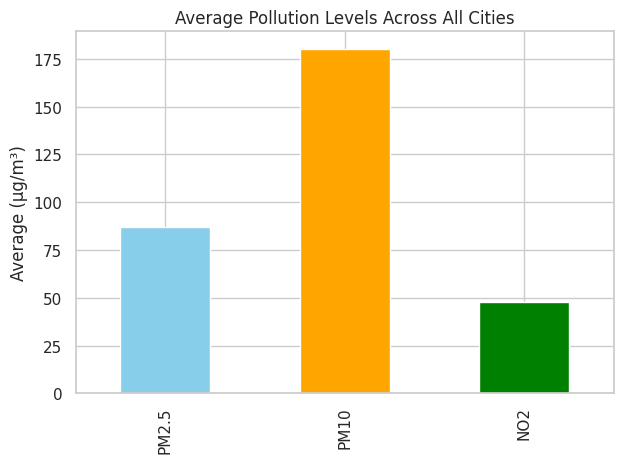

In [ ]:
# Q5: What are the average levels of PM2.5, PM10, and NO2 across all cities?
# A5: We calculate the mean of each column to understand average pollution exposure.

averages = df[["PM2.5", "PM10", "NO2"]].mean()

averages.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Average Pollution Levels Across All Cities")
plt.ylabel("Average (µg/m³)")
plt.tight_layout()
plt.show()

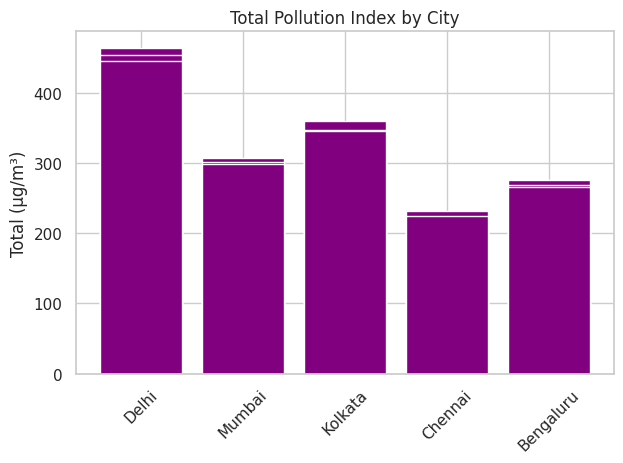

In [ ]:
# Q6: Which city has the highest total pollution index (PM2.5 + PM10 + NO2)?
# A6: This gives an overall pollution burden per city.

df["Total_Index"] = df["PM2.5"] + df["PM10"] + df["NO2"]

plt.bar(df["City"], df["Total_Index"], color='purple')
plt.title("Total Pollution Index by City")
plt.ylabel("Total (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


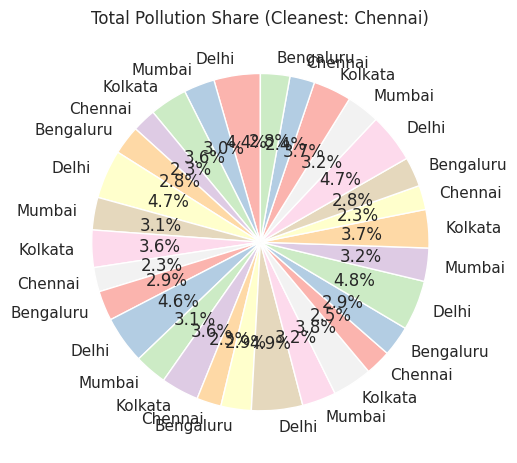

In [ ]:
# Q7: Which city has the cleanest air (lowest total pollution index)?
# A7: The city with the lowest total index is considered cleanest among all.

min_index_city = df.loc[df["Total_Index"].idxmin(), "City"]

plt.pie(df["Total_Index"], labels=df["City"], autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title(f"Total Pollution Share (Cleanest: {min_index_city})")
plt.tight_layout()
plt.show()

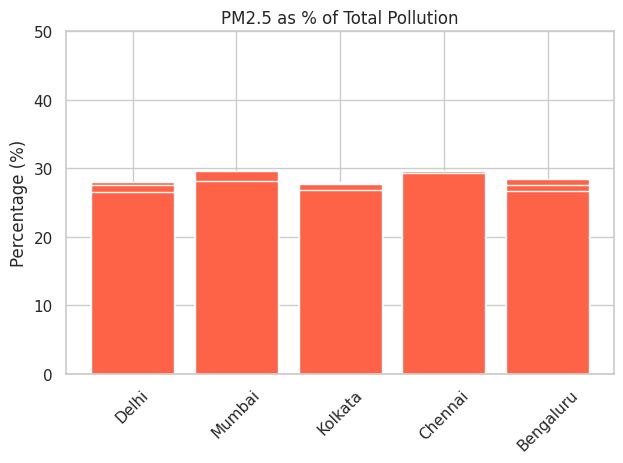

In [ ]:
# Q8: What percentage of each city's total pollution is due to PM2.5?
# A8: This helps understand the fine particulate contribution.

df["PM2.5_pct"] = (df["PM2.5"] / df["Total_Index"]) * 100

plt.bar(df["City"], df["PM2.5_pct"], color='tomato')
plt.title("PM2.5 as % of Total Pollution")
plt.ylabel("Percentage (%)")
plt.ylim(0, 50)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

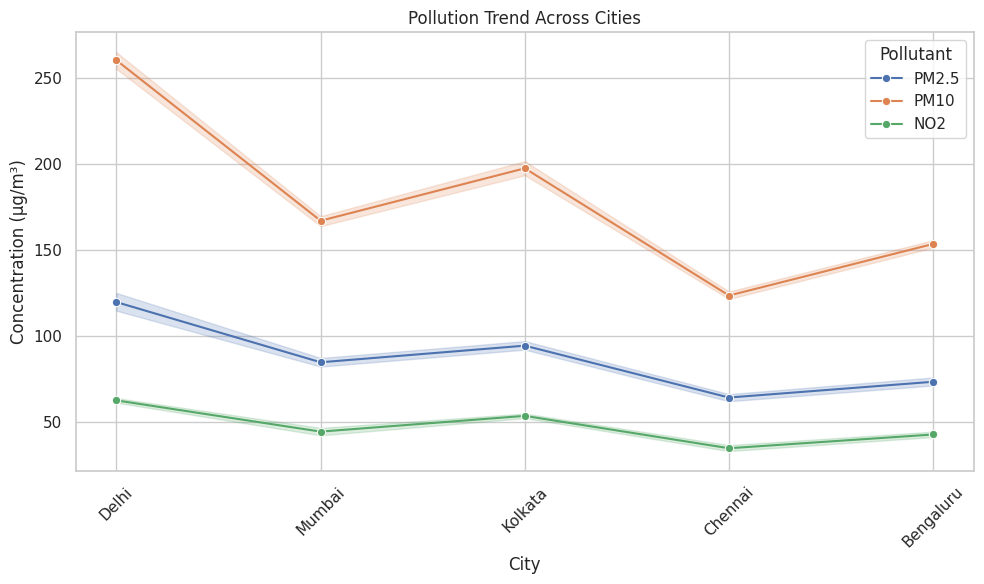

In [ ]:
# Q9: How does pollution trend across the cities in the dataset?
# A9: We'll visualize how PM2.5, PM10, and NO2 concentrations vary across different cities.

df_melted = df.melt(id_vars=["City"], value_vars=["PM2.5", "PM10", "NO2"], var_name="Pollutant", value_name="Concentration")

plt.figure(figsize=(10,6))
sns.lineplot(x="City", y="Concentration", hue="Pollutant", data=df_melted, marker='o')
plt.title("Pollution Trend Across Cities")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

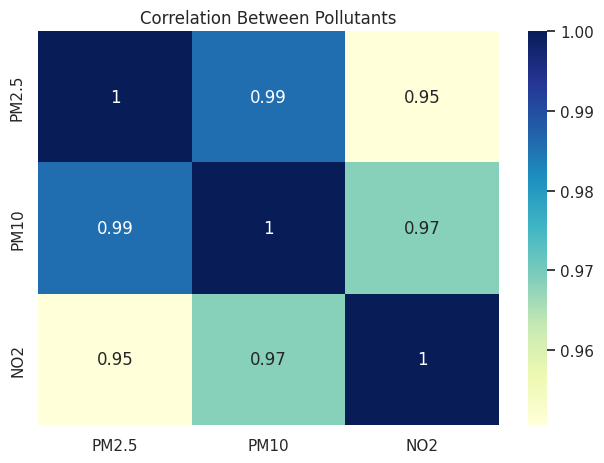

In [ ]:
# Q10: Are PM2.5, PM10, and NO2 correlated?
# A10: A correlation heatmap shows how pollutants are interrelated. Strong correlation implies shared sources.

import seaborn as sns

correlation = df[["PM2.5", "PM10", "NO2"]].corr()

sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.title("Correlation Between Pollutants")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Feature & target selection
X = df[['pm10', 'no2']]
y = df['pm2.5']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

Linear Regression Performance:
RMSE: 4.12
MAE: 3.40
